# CSc 177- Project 2 - Linear Regression and Classification Tree
## By Alec Resha
## Due: April 12, 2022

In [49]:
# Dataset of "bottle" is from https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Chosen Dataset

### Loading in Data

In [51]:
df = pd.read_csv("./data/bottle.csv")

C:\Users\Alecr\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [52]:
# T_degC is temp in Celcius, Salnty is the Salinity in g per kg, Depthm is the depth in meters, O2ml_L is the oxygen in ml per liter
df = df[["T_degC", "Salnty", "Depthm", "O2ml_L"]]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

### Simple Linear Regression

#### Data Splitting and Linear Regression

In [53]:
x_train, x_test = train_test_split(df["T_degC"].values.reshape(-1, 1), test_size=0.2)

In [54]:
y_train, y_test = train_test_split(df["Salnty"].values.reshape(-1, 1), test_size=0.2)

In [55]:
linear_regressor = LinearRegression(fit_intercept=True, normalize=True)
linear_regressor.fit(x_train, y_train)

LinearRegression(normalize=True)

#### Data evaluation and visualization

In [56]:
# Train mean squared error
# Temp and salinity are being compared for simple linear regression
print("Mean Squared Error for Training Set:", mean_squared_error(y_train, linear_regressor.predict(x_train)))

Mean Squared Error for Training Set: 0.21175824134684196


<function matplotlib.pyplot.show(close=None, block=None)>

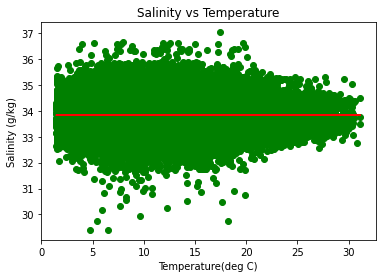

In [57]:
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, linear_regressor.predict(x_train), color="red")
plt.title("Salinity vs Temperature")
plt.xlabel("Temperature(deg C)")
plt.ylabel("Salinity (g/kg)")
plt.show

In [58]:
# MSE for test set
print("Mean Squared Error for Testing Set:", mean_squared_error(y_test, linear_regressor.predict(x_test)))

Mean Squared Error for Testing Set: 0.21254452952316563


<function matplotlib.pyplot.show(close=None, block=None)>

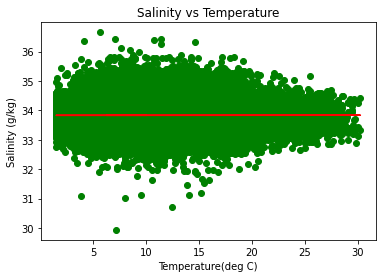

In [59]:
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, linear_regressor.predict(x_test), color="red")
plt.title("Salinity vs Temperature")
plt.xlabel("Temperature(deg C)")
plt.ylabel("Salinity (g/kg)")
plt.show

### Multiple Linear Regression

#### Data Splitting and Linear Regression

In [60]:
x_train, x_test = train_test_split(df[["T_degC", "Depthm", "O2ml_L"]], test_size=0.2)
y_train, y_test = train_test_split(df["Salnty"], test_size=0.2)

In [61]:
linear_regressor = LinearRegression().fit(x_train, y_train)

#### Linear Regression Evaluation

In [62]:
# Train mean squared error
print("Mean Squared Error for Training Set:", mean_squared_error(y_train, linear_regressor.predict(x_train)))

Mean Squared Error for Training Set: 0.21206880519545226


In [63]:
# Test mean squared error
print("Mean Squared Error for Testing Set:", mean_squared_error(y_test, linear_regressor.predict(x_test)))

Mean Squared Error for Testing Set: 0.21130126365382598


## Provided Dataset

### Loading in Data

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [65]:
df = pd.read_csv("./data/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")

### Linear Regression

#### Simple Line Regression

In [66]:
x, y = df["GRE Score"].values.reshape(-1, 1), df["Chance of Admit "].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [67]:
linear_regressor = LinearRegression(fit_intercept=True, normalize=True)
linear_regressor.fit(x_train, y_train)

LinearRegression(normalize=True)

In [68]:
# MSE for test set
print("Mean Squared Error for Testing Set:", mean_squared_error(y_test, linear_regressor.predict(x_test)))

Mean Squared Error for Testing Set: 0.0071318033076448115


<function matplotlib.pyplot.show(close=None, block=None)>

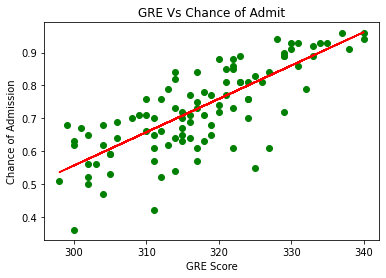

In [69]:
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, linear_regressor.predict(x_test), color="red")
plt.title("GRE Vs Chance of Admit")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.show

#### Multiple Linear Regression

In [70]:
x, y = df[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]], df["Chance of Admit "]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [71]:
linear_regressor = LinearRegression().fit(x_train, y_train)

In [72]:
# Test mean squared error
print("Mean Squared Error for Testing Set:", mean_squared_error(y_test, linear_regressor.predict(x_test)))

Mean Squared Error for Testing Set: 0.0028376825494695946


### Classification

In [80]:
df = pd.read_csv("./data/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")

In [81]:
# Classes: 
# 0-0.4: Low
# 0.4-0.7: Medium
# 0.7-1.0: High
def classifier(row):
    if row['Chance of Admit '] <= 0.4:
        return -1
    elif row['Chance of Admit '] <= 0.7:
        return 0
    elif row['Chance of Admit '] <= 1.0:
        return 1
    else:
        return 2 # This should never happen
df['chance'] = df.apply(classifier, axis=1)

#### Splitting

In [82]:
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
x = df[feature_cols]
y = df['chance']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Model

In [102]:
classifier = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=0.01, max_leaf_nodes=20).fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#### Evaluation

In [103]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


#### Visualization

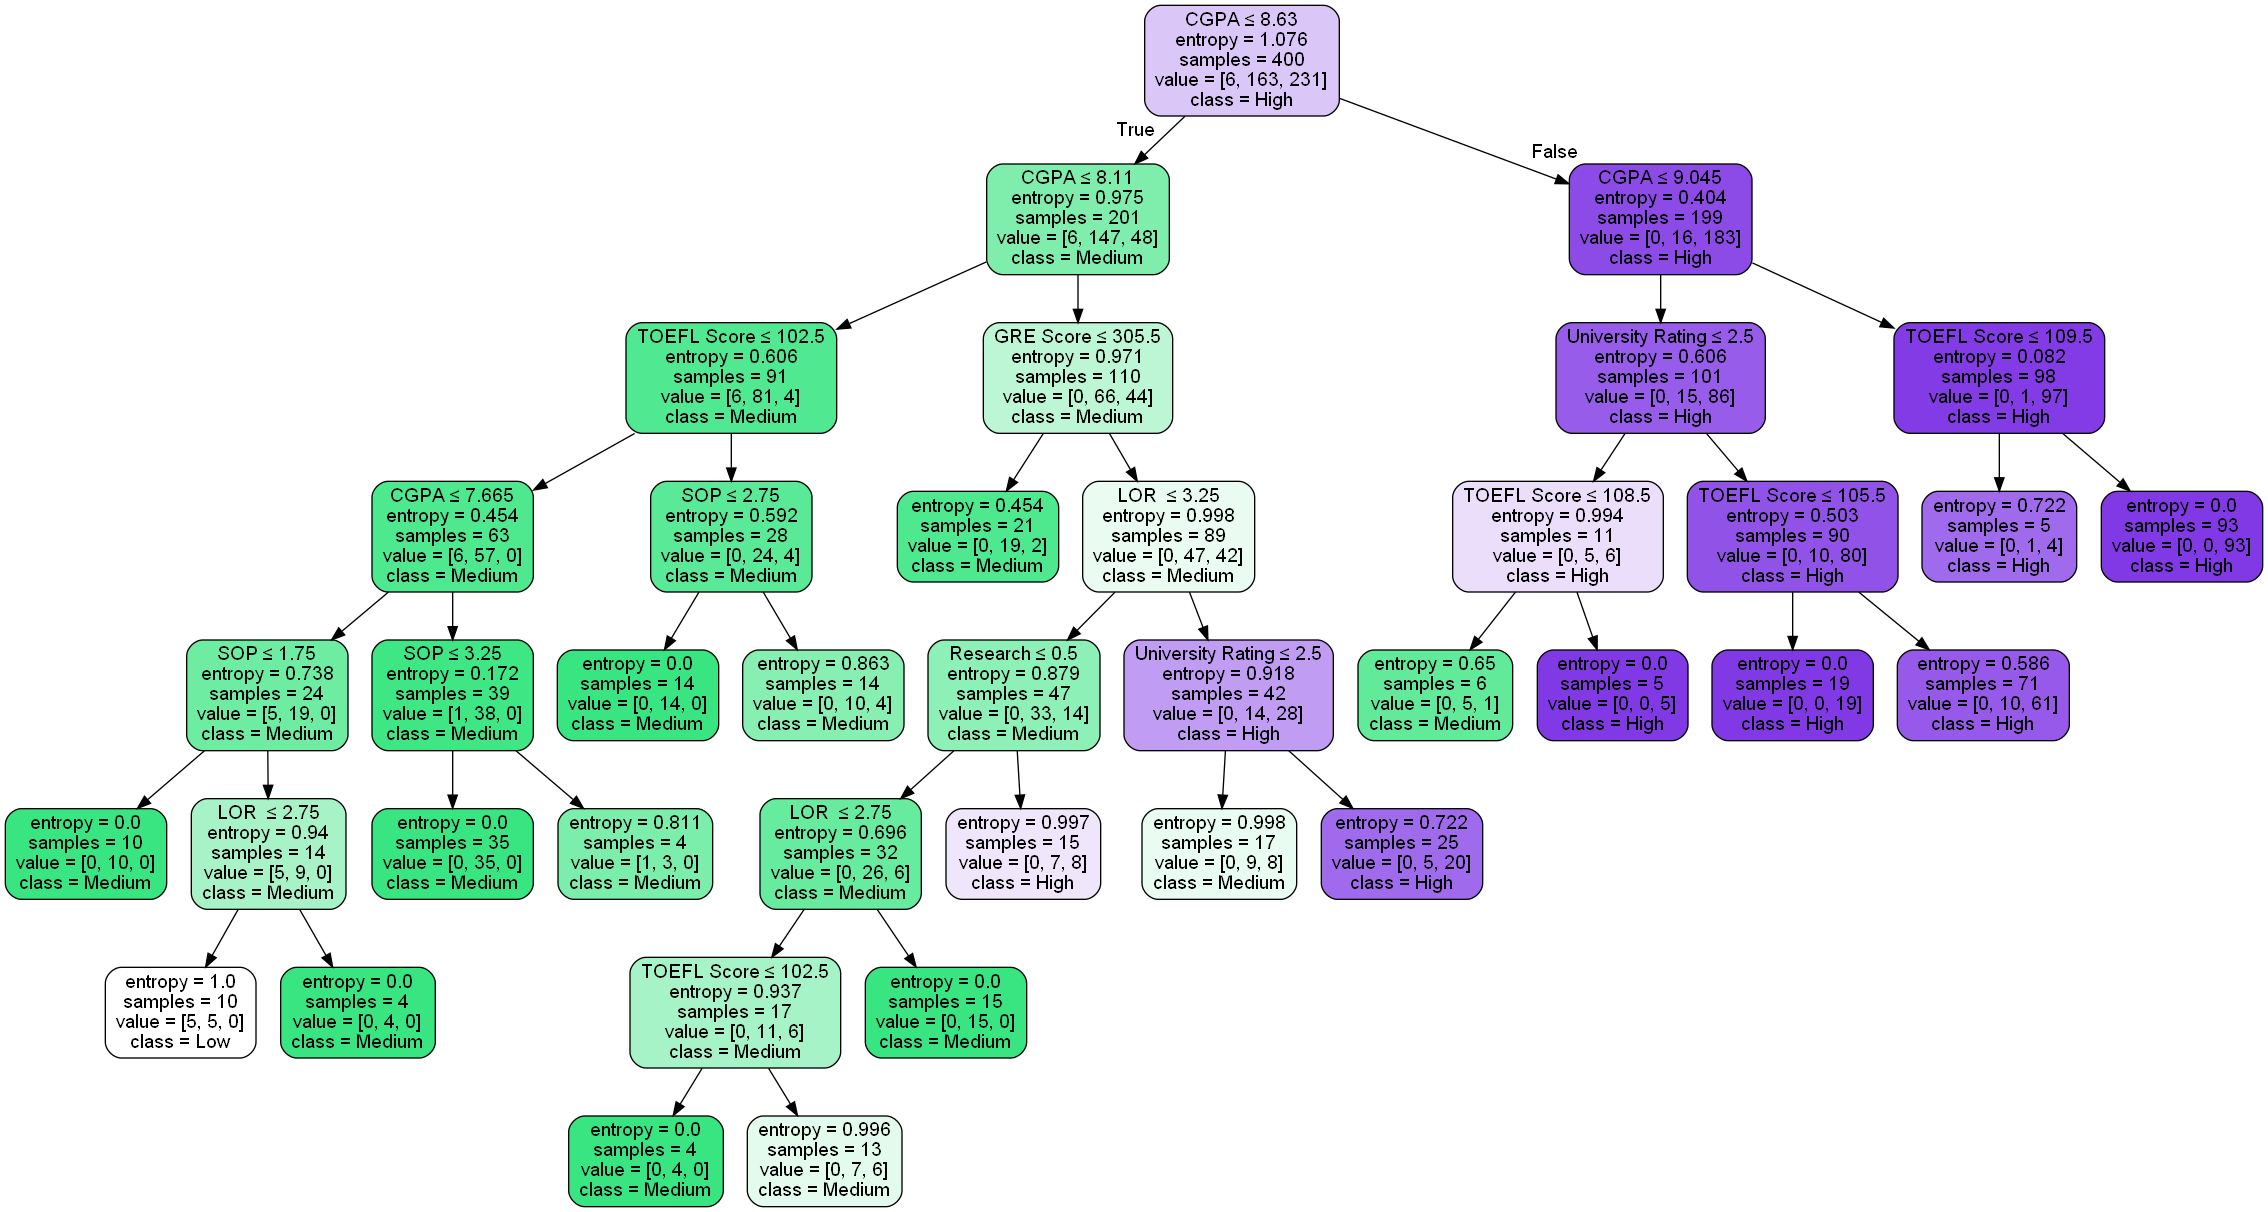

In [104]:
dot_data = StringIO()
export_graphviz(classifier,
                filled=True,
                out_file=dot_data,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['Low', 'Medium', 'High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("decision_tree.png")
Image(graph.create_png())